FFT for 1D img

In [54]:
import numpy as np
import cv2
import array
from matplotlib import pyplot as plt

In [59]:
def DFT(img):
    dft = []
    N = img.shape[0]
    for k in range(0, N):
        sum = 0
        for n in range(0, N):
            sum += img[n]*(np.exp((-2j)*np.pi*k*n/N))
            
        dft.append(sum)
    return dft

def FFT(img):
    M = img.shape[0]
    odd = []
    even = []
    G = []
    H = []
    if M == 1:
        return(DFT(img))
    else:
        # divide the img in 2, even and odd indices
        for i in range(M):
            if i%2==0:
                even.append(img[i])
            else:
                odd.append(img[i])
        # copy() -> creates copy of exisiting list
        G = (DFT(np.array(even)))
        H = (DFT(np.array(odd)))
        
        F1 = []
        for u in range(0, int(M/2)):
            temp1 = G[u] + np.multiply(np.exp(-2j*np.pi*u/M), H[u])
            F1.append(temp1)
        for u in range(int(M/2), M):
            temp2 = G[u-int(M/2)] - np.multiply(np.exp(-2j*np.pi*(u-int(M/2))/M), H[u-int(M/2)])
            F1.append(temp2)
            return(F1)

In [62]:
def IFFT(img):
    # conj -> complex conjugate
    # IFFT = 1/N conj(FFT(conj(X)))
    N = img.shape[0]
    
    ifft = (1/N * np.conj(FFT(np.conj(img))))
    
    return ifft

In [61]:
img = np.array([1,5,6,9,11,14,21,26])

#np.fft.rfft -> Compute the one-dimensional discrete Fourier Transform for real input
print("In-built: ", np.fft.fft(img))
#User defined FFT function
print("User-defined: ", FFT(img))

In-built:  [ 93.         +0.j          -4.34314575+33.38477631j
 -15.        +16.j         -15.65685425 +3.38477631j
 -15.         +0.j         -15.65685425 -3.38477631j
 -15.        -16.j          -4.34314575-33.38477631j]
User-defined:  [(93+0j), (-4.3431457505076265+33.38477631085024j), (-15.000000000000009+15.999999999999995j), (-15.656854249492385+3.384776310850228j), (-15+0j)]


FFT of Image (2D signal) using FFT of 1D signal

In [63]:
imgLena = cv2.imread('IMG_1114.jpg', 0)
imgDog = cv2.imread('IMG_1115.jpg', 0)

imgLena = cv2.resize(imgLena, (256, 256))
imgDog = cv2.resize(imgDog, (256, 256))

In [64]:
def FFT_2D(img):
    row=[]
    col=[]
    
    # FFT over the rows of the image (Real to Complex)
    for x in img:
        row.append(FFT(x))
    
    result2 = np.array(row)
    
    # .T gives the transpose of the numpy array
    # FFT of columns (Complex to Complex)
    for y in result2.T:
        col.append(FFT(y))
    
    result3 = np.array(col)
    
    return result3.T

In [65]:
def IFFT_2D(img):
    row=[]
    col=[]
    
    # IFFT over the rows of the image (Real to Complex)
    for x in img:
        row.append(IFFT(x))
    
    result2 = np.array(row)
    
    # .T gives the transpose of the numpy array
    # IFFT of columns (Complex to Complex)
    for y in result2.T:
        col.append(IFFT(y))
    
    result3 = np.array(col)
    
    return result3.T

In [66]:
#np.fft.fft2 -> Compute the one-dimensional discrete Fourier Transform for real input
print("In-built: ", np.fft.fft2(imgLena))
#User defined FFT function
print("User-defined: ", FFT_2D(imgLena))

In-built:  [[ 8.13917100e+06     +0.j         -1.17454310e+05+597532.06826899j
   3.87426539e+05-279160.48419492j ... -6.20787622e+04-157652.48794667j
   3.87426539e+05+279160.48419492j -1.17454310e+05-597532.06826899j]
 [-5.52596477e+03-306146.22774579j -4.01709610e+05+393540.31695673j
  -2.76931407e+05 +14565.69593383j ...  1.65416053e+05+201358.18739761j
  -8.80806368e+04+112366.96639062j  8.82538138e+03+236507.09701796j]
 [-1.11737220e+05 -42316.27727337j -6.81357047e+04 -34491.62738675j
   1.69600992e+05-109764.55339941j ...  8.95020192e+04+231320.28735473j
  -1.80784518e+05 -43960.42285952j  2.05377767e+05 -14585.69512515j]
 ...
 [ 1.28130459e+05 -55891.90697105j  1.85993185e+05+174772.41925428j
  -1.31849846e+05 -49428.01053912j ...  2.49145631e+05 +19832.85403212j
   2.83056850e+04-170370.41366185j -1.03393312e+04+151213.38302532j]
 [-1.11737220e+05 +42316.27727337j  2.05377767e+05 +14585.69512515j
  -1.80784518e+05 +43960.42285952j ... -1.34346059e+05-184959.11136413j
   1.696

Swap Phase and Magnitude

In [38]:
def swapMagPhase(img1, img2):
    result = np.multiply(np.abs(img1), np.exp(1j*np.angle(img2)))
    return result

In [ ]:
FFTLena = FFT_2D(imgLena)
FFTDog = FFT_2D(imgDog)

In [40]:
Phase_Lena_Mag_Dog = swapMagPhase(FFTLena, FFTDog)
Phase_Dog_Mag_Lena = swapMagPhase(FFTDog, FFTLena)

In [44]:
pLmD = IFFT_2D(Phase_Lena_Mag_Dog)
pDmL = IFFT_2D(Phase_Dog_Mag_Lena)

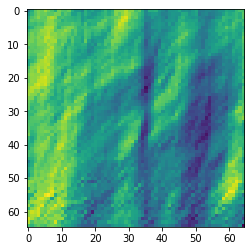

In [53]:
img1 = np.abs(pLmD)
plt.imshow(img1)

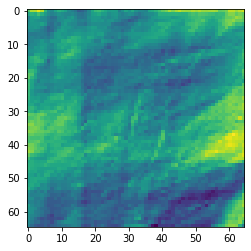

In [52]:
img2 = np.abs(pDmL)
plt.imshow(img2)